# Neural Net

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

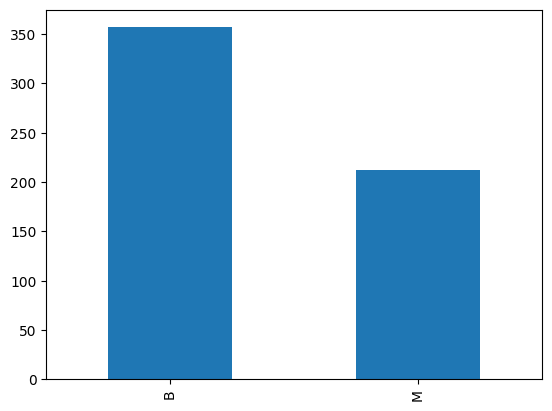

In [66]:
# Load the breast cancer dataset dropping first 2 columns
wdbc = pd.read_csv('data/wdbc.data', header=None)

#plot chart of class distribution
wdbc[1].value_counts().plot(kind='bar')

# split into x and y and encode the target variable to 0 and 1 for malignant and benign
X = wdbc.iloc[:, 2:]
y = wdbc.iloc[:, 1]
le = LabelEncoder()
y = le.fit_transform(y)



In [67]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15,6,3), max_iter=1000)  # Adjust hidden layers as needed
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(15, 6, 3), max_iter=1000)

[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



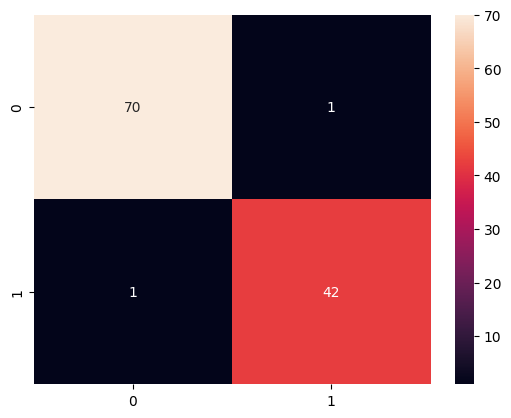

In [68]:
# Evaluate the model
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# display the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)
plt.show()

In [69]:
import numpy as np

print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(np.unique(y))))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))

This dataset has 30 input nodes and 2 output node(s)
There are 4 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 30x15 (30 nodes feeding into a layer of 15 nodes)
  1: 15x6 (15 nodes feeding into a layer of 6 nodes)
  2: 6x3 (6 nodes feeding into a layer of 3 nodes)
  3: 3x1 (3 nodes feeding into a layer of 1 nodes)

There are 4 1D arrays of intercepts, one for each layer
Each layer has [15, 6, 3, 1] intercepts, one for each node


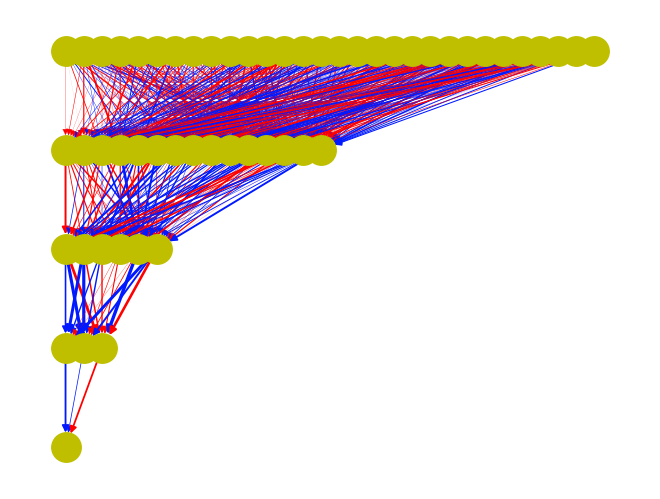

In [70]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)